# Simple linear regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S32_L187/1.01. Simple linear regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Create your first regression

If you create a regression, it should be meaningful

### Define the dependent and the independent variables

In [5]:
y = data['GPA']
x1 = data['SAT']

### Explore the data

<function matplotlib.pyplot.show(*args, **kw)>

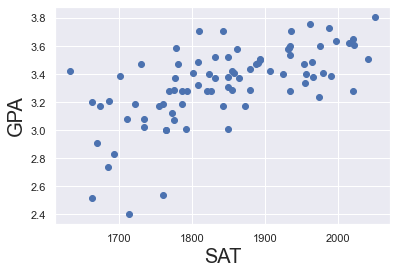

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show

### Regression itself

Results will contain the output of the Ordinary Least Squares (OLS) regression.

fit() will apply a specific estimation technique (OLS in this case) to obtain the fit of the model.

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 09 May 2020   Prob (F-statistic):           7.20e-11
Time:                        20:37:53   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot the regression line

The yhat variable is added to represent the regression formula, using the SAT coefficient and the constant coefficient.

<function matplotlib.pyplot.show(*args, **kw)>

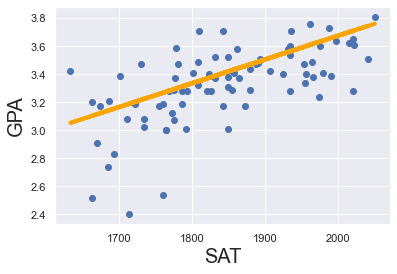

In [8]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show

## How to interperet the regression table

The graph is just a visual representation of the regression. The tables are the main info part.
Typically you have 3 main tables, a model summary, a coefficients table and some additional tests.

Constant, coefficient and bias are used interchangeably

Standard error shows the accuracy of prediction for a given variable. The lower the standard error the better

T statistic and P value follow in the table and are related to the hypothesis testing parts

P value below 0.05 means that the varialbe is significant

## What is the OLS?

Its good to check the regression was coded correctly

OLS is the most common method to do linear regression.
This method aims to find the line that minimises the sum of squared errors.

Graphically it is the line that is closest to all points.

Other methods are:
    - Generalised least squares
    - Maximum likelihood estimation
    - Bayesian regression
    - Kernel regression
    - Gaussian process regression

OLS is powerful enough for most problems.

## R-Squared

R^2 = SSR / SST
or
Variability explained by the regression / Total variability of the dataset

R^2 of 0 means that regression explains NONE of the variability of the data.

R^2 of 1 means that regression explains ALL of the variability of the data.


R^2 of 1 is rare. Usually see between 0.2 and 0.9.
What is a good R^2? There is no definite answer.
Physicists usually look for R^2 between 0.7 and 0.99.
But in social sciencies such as economics and finance, 0.2 can be great.
It depends on the complexity of the topic and how many variabiles are believed to be at play.

R^2 in the example above was only 0.406, which goes to say that education is not the only variable needed to accurately predict salary.

Before agreeing that a variable is significant, need to understand why.

R^2 measures goodness of fit. The more factors you include in the regression the higher the fit could be.